In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import kneighbors_graph

data = pd.read_csv('common/data/earthquake_data.csv')
R = 63710

lat_rad = np.radians(data['latitude'])
lon_rad = np.radians(data['longitude'])
r = R - data['depth']

data['x'] = r * np.cos(lat_rad) * np.cos(lon_rad)
data['y'] = r * np.cos(lat_rad) * np.sin(lon_rad)
data['z'] = r * np.sin(lat_rad)
X = data[['x','y','z']].values

adj_matrix = kneighbors_graph(X, n_neighbors=7, mode='connectivity', include_self=False)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_spatial = scaler.fit_transform(data[['x', 'y', 'z']])
X_mag = scaler.fit_transform(data[['mag']])

# Increase alpha to make clusters geographically tighter
alpha = 2.0 
X_combined = np.hstack([X_spatial * alpha, X_mag])

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_combined)

data.to_csv('results/earthquake_clusters_spatially_constraied_kmeans.csv', index = False)

In [4]:
data['cluster'].value_counts()

cluster
0    205
2     14
1      5
Name: count, dtype: int64

In [5]:
from common.module_functions import *

In [6]:
visualize_3d(data)

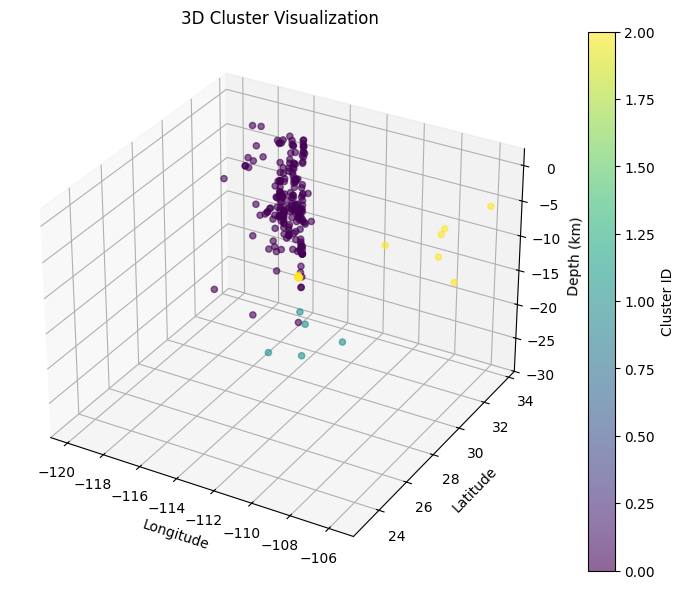

In [7]:
visualize_3d_static(data)


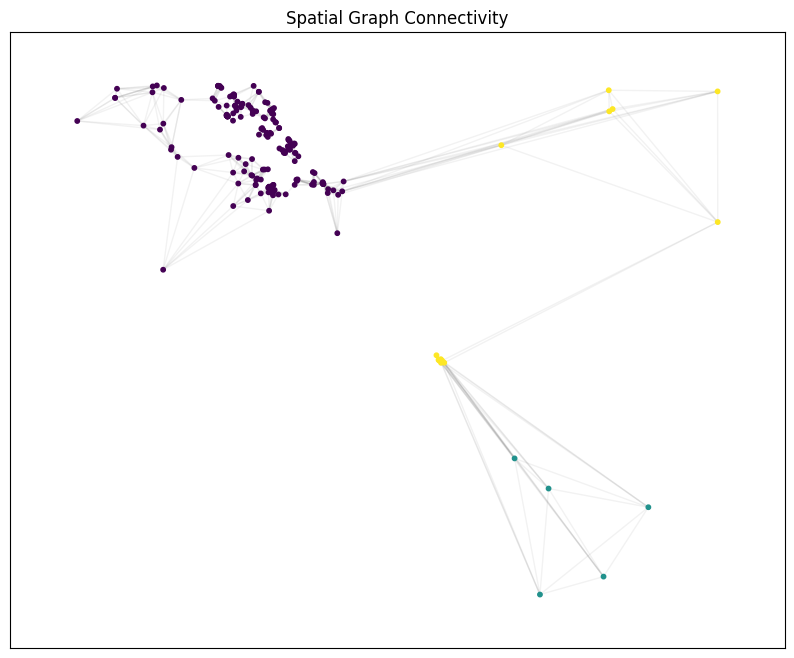

In [8]:
visualize_graph_connectivity(data, adj_matrix)

In [9]:
calculate_sillouette_score(X_combined, data)

Silhouette Score: 0.7208434122062466


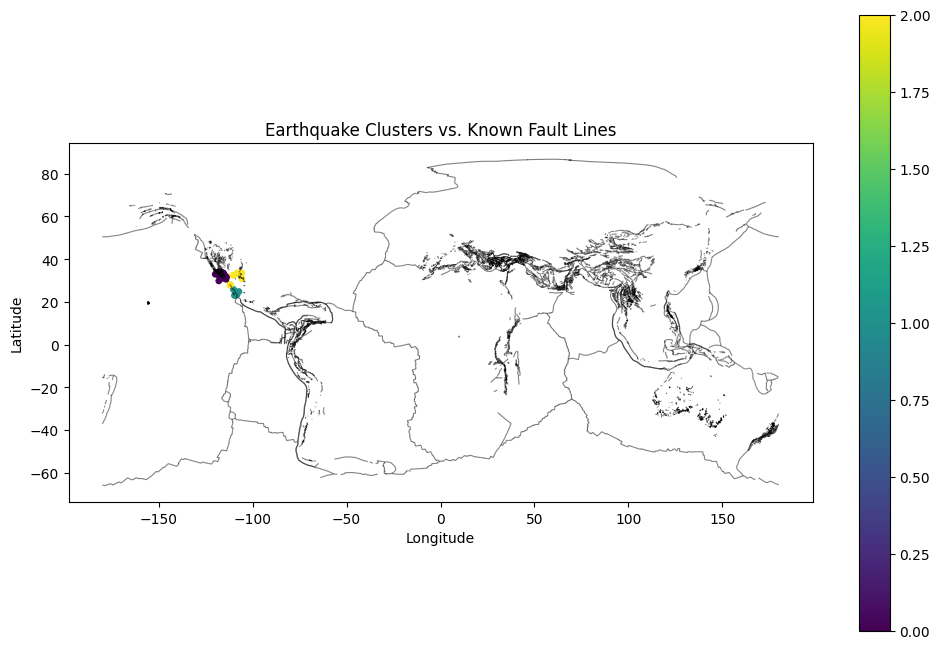

In [10]:
visualize_clusters_on_known_fault_lines(data, crs = "EPSG:4326")